# Import Necessary Python Libraries



In [63]:
import os
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Concatenate, Conv1D, MaxPooling1D, GlobalMaxPool1D, UpSampling1D, Reshape
from tensorflow.keras import backend as K
from sklearn.model_selection import KFold, LeaveOneGroupOut, ShuffleSplit, train_test_split, GroupKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import itertools

#Getting Data

In [64]:
# connecting to Google Drive

from google.colab import drive
drive.mount('/content/drive')
project_path ='drive/MyDrive/Colab Notebooks/HAR/second_sem_proj'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Description**

For each participant, the study had been commenced by collecting their demographic (age and gender) and physically-related (height and weight) information. Then, we provided them with a dedicated smartphone (iPhone 6) and asked them to store it in their trousers' front pocket during the experiment. All the participant were asked to wear flat shoes. We then asked them to perform 6 different activities (walk downstairs, walk upstairs, sit, stand and jogging) around the Queen Mary University of London's Mile End campus. For each trial, the researcher set up the phone and gave it to the current participants, then the researcher stood in a corner. Then, the participant pressed the start button of Crowdsense app and put it in their trousers' front pocket and performed the specified activity. We asked them to do it as natural as possible, like their everyday life. At the end of each trial, they took the phone out of their pocket and pressed the stop button.

In [65]:
# Download data

!wget "https://github.com/mmalekzadeh/motion-sense/raw/master/data/A_DeviceMotion_data.zip"
!unzip A_DeviceMotion_data.zip

--2023-06-14 21:39:56--  https://github.com/mmalekzadeh/motion-sense/raw/master/data/A_DeviceMotion_data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmalekzadeh/motion-sense/master/data/A_DeviceMotion_data.zip [following]
--2023-06-14 21:39:56--  https://raw.githubusercontent.com/mmalekzadeh/motion-sense/master/data/A_DeviceMotion_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73696396 (70M) [application/zip]
Saving to: ‘A_DeviceMotion_data.zip.1’

A_DeviceMotion_data 100%[===================>]  70.28M   217MB/s    in 0.3s    

2023-06-14 21:39:57 (217 MB/s) - ‘A_DeviceMotion_d

In [68]:
# Just a map to match the folder names with activities
activities_map = {
     "downstairs":"dws",
     "jogging":"jog",
     "sitting":"sit",
     "standing":"std",
     "walking":"wlk",
     "upstairs":"ups",
}

In [69]:
# A dictionary of all subjects

subjects_dict = {str("sub_"+str(i)):0 for i in range(1,25)}

#Data Formatting

In this stage I am just collecting the data and formatting in a dataframe. Since the data is structured in folders. Each activity has folder code as shown above in "activity_map" and the number associated with the folder is the trial. Each activity trial has data from 24 subjects.I am destructuring that and accumulating all in pandas dataframe, with all labels of all trials and all user ids.

P.S: We are interested only on the Accelerometer and Gyroscrope data, so discarding all other sensor data as well

In [70]:
#Downstairs

df_dws=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/dws_1/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "downstair"
  df_dws = pd.concat([df_dws,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/dws_11/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "downstair"
  df_dws = pd.concat([df_dws,df],axis=0)


for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/dws_2/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "downstair"
  df_dws = pd.concat([df_dws,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_dws = df_dws.iloc[:,[7,8,9,10,11,12,13,14]]

#jogging
df_jog=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/jog_16/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "jogging"
  df_jog = pd.concat([df_jog,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/jog_9/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "jogging"
  df_jog = pd.concat([df_jog,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_jog = df_jog.iloc[:,[7,8,9,10,11,12,13,14]]

#sitting
df_sit=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/sit_13/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "sitting"
  df_sit = pd.concat([df_sit,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/sit_5/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "sitting"
  df_sit = pd.concat([df_sit,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_sit = df_sit.iloc[:,[7,8,9,10,11,12,13,14]]

#standing
df_std=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/std_6/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "standing"
  df_std = pd.concat([df_std,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/std_14/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "standing"
  df_std = pd.concat([df_std,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_std = df_std.iloc[:,[7,8,9,10,11,12,13,14]]


#upstairs
df_ups=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/ups_12/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "upstairs"
  df_ups = pd.concat([df_ups,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/ups_3/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "upstairs"
  df_ups = pd.concat([df_ups,df],axis=0)

for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/ups_4/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "upstairs"
  df_ups = pd.concat([df_ups,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_ups = df_ups.iloc[:,[7,8,9,10,11,12,13,14]]


#walking
df_wlk=pd.DataFrame()
for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/wlk_7/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "walking"
  df_wlk = pd.concat([df_wlk,df],axis=0)



for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/wlk_8/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "walking"
  df_wlk = pd.concat([df_wlk,df],axis=0)

for subject in subjects_dict.keys():
  df = pd.read_csv(f"A_DeviceMotion_data/wlk_15/{subject}.csv", engine='python')
  df['subject'] = subject
  df['activity'] = "walking"
  df_wlk = pd.concat([df_wlk,df],axis=0)

# Keeping only acceleormeter and gyroscope data
df_wlk = df_wlk.iloc[:,[7,8,9,10,11,12,13,14]]


# Data Cleaning

In [71]:
#combine all acitivities of all users in one combined dataframe
single_df = pd.concat([df_dws,df_ups,df_wlk,df_sit,df_jog,df_std],axis=0)

# Handling the missing values if any
print("\tHandling missing values...")
single_df['rotationRate.x'] = single_df['rotationRate.x'].interpolate()
single_df['rotationRate.y'] = single_df['rotationRate.y'].interpolate()
single_df['rotationRate.z'] = single_df['rotationRate.z'].interpolate()
single_df['userAcceleration.x'] = single_df['userAcceleration.x'].interpolate()
single_df['userAcceleration.y'] = single_df['userAcceleration.y'].interpolate()
single_df['userAcceleration.z'] = single_df['userAcceleration.z'].interpolate()

# Removing outliers as they can potentially increase bias and affect the prediction
print("\tRemoving outliers...\n")
single_df['rotationRate.x'] = single_df["rotationRate.x"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")
single_df['rotationRate.y'] = single_df["rotationRate.y"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")
single_df['rotationRate.z'] = single_df["rotationRate.z"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")
single_df['userAcceleration.x'] = single_df["userAcceleration.x"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")
single_df['userAcceleration.y'] = single_df["userAcceleration.y"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")
single_df['userAcceleration.z'] = single_df["userAcceleration.z"].rolling(window=3, center=True).median().fillna(method="backfill").fillna(method="ffill")

# Standardizing the data
print("Standardizing everything...")
standardScaler = StandardScaler()
single_df[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z']] = standardScaler.fit_transform(single_df[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z']])


	Handling missing values...
	Removing outliers...

Standardizing everything...


In [72]:
# Lets visualize the data after cleaning
single_df.head(2)

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject,activity
0,0.25204,0.373756,0.821908,0.77137,0.005805,0.227101,sub_1,downstair
1,0.25204,0.373756,0.821908,0.77137,0.005805,0.227101,sub_1,downstair


# Data Segmentation
Segment in window of 200 samples each

In [73]:
acc_samples, gyr_samples, labels, subjects, tss = [], [], [], [], []
win_len = 200


for subject in subjects_dict.keys():
  subject_df = single_df[(single_df['subject'] == subject)]
  subject_df_split = np.array_split(subject_df, math.trunc(subject_df.shape[0]/win_len))

  for item in list(range(0, math.trunc(subject_df.shape[0]/win_len))):
    # we go on only if the windows include 200 measurements (e.g., the first window could include some more values)
    if(len(subject_df_split[item]) == win_len):
      temp_df = subject_df_split[item]
      acc_win = temp_df[["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]].to_numpy()     # we cannot give pandas dataframes as input to deep learning models
      gyr_win = temp_df[["rotationRate.x", "rotationRate.y", "rotationRate.z"]].to_numpy()
      lab = temp_df['activity'].mode()[0]
      acc_samples.append(acc_win)
      gyr_samples.append(gyr_win)
      labels.append(lab)
      subjects.append(subject)

acc_samples = np.asarray(acc_samples)
gyr_samples = np.asarray(gyr_samples)
labels = np.asarray(labels)
subjects = np.asarray(subjects)

print(f"Accelerometer data: {acc_samples.shape}")
print(f"Gyroscope data: {gyr_samples.shape}")
print(f"Labels data: {labels.shape}")
print(f"Subjects data: {subjects.shape}")

Accelerometer data: (4587, 200, 3)
Gyroscope data: (4587, 200, 3)
Labels data: (4587,)
Subjects data: (4587,)


In [74]:
# combining accelerometer and gyroscope data
samples = np.concatenate((acc_samples, gyr_samples), axis=2)
labels, users = labels, subjects

print("Samples:", samples.shape)
print("Labels:", labels.shape)
print("Users:", users.shape)

classes = sorted(list(set(labels)))
print("Classes:", classes)

Samples: (4587, 200, 6)
Labels: (4587,)
Users: (4587,)
Classes: ['downstair', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']


In [75]:
# We are using One Hot Encoder for the labels

enc = OneHotEncoder()
ohe_labels = enc.fit_transform(labels.reshape(-1,1)).toarray()

print(f"Original list of labels: {classes}")

print(f'Example of original label: {labels[2000]}')
print(f"...and the corresponding one-hot encoded version: {ohe_labels[2000]}")

Original list of labels: ['downstair', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']
Example of original label: sitting
...and the corresponding one-hot encoded version: [0. 0. 1. 0. 0. 0.]


# Test train split

<br>

We simulate a scenario in which we want to recognize the activities of a new subject, but we don't have many labeled data.

Fortunately, we had already provided our framework to other subjects, and we have much more labeled data of them. The only problem is that we never collected data about the activity "sitting", but now we want to recognize it for the new subject.

What can we do?

We split the dataset into:
* **Pre-train set**: labeled data from the subjects that already use our framework, without the sitting activity
* **Fine-tuning set**: low amount of labeled data from the new subject, including the sitting activity
* **Test set**: labeled data from the new subject, useful to validate our transfer learning solution

Then we will compare two models:
1. **Baseline**: a method that relies only on the low amount of labeled data from the new subject (i.e., the fine-tuning set)
2. **Transfer Learning method**: a method pre-trained on the pre-train set (without the sitting activity), and fine-tuned on the fine-tuning set (with the sitting activity). This method transfers its knowledge about the previous subjects to the new subject

In [78]:
pre_train = np.where((users != 'sub_24') & (labels != "sitting"))[0]
fine_tuning = np.where((users == 'sub_24'))[0]

# from the data of the new subject, we use 5% for fine-tuning and 95% for test
fine_tuning, test, _, _ = train_test_split(fine_tuning, labels[fine_tuning], test_size=0.95, random_state=0)

print(f"Pre-train size: {len(pre_train)} ({len(pre_train)/(len(pre_train)+len(fine_tuning)+len(test))*100:.2f}%) -> {len(pre_train)*2/60:.2f} minutes of data. Activities: {sorted(list(set(labels[pre_train])))}")
print(f"Fine-tuning size: {len(fine_tuning)} ({len(fine_tuning)/(len(pre_train)+len(fine_tuning)+len(test))*100:.2f}%) -> {len(fine_tuning)*2/60:.2f} minutes of data. Activities: {sorted(list(set(labels[fine_tuning])))}")
print(f"Test size: {len(test)} ({len(test)/(len(pre_train)+len(fine_tuning)+len(test))*100:.2f}%). Activities: {sorted(list(set(labels[test])))}")

Pre-train size: 2884 (92.02%) -> 96.13 minutes of data. Activities: ['downstair', 'jogging', 'standing', 'upstairs', 'walking']
Fine-tuning size: 12 (0.38%) -> 0.40 minutes of data. Activities: ['downstair', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']
Test size: 238 (7.59%). Activities: ['downstair', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']


In [79]:
fine_tuning

array([4424, 4373, 4358, 4548, 4346, 4440, 4532, 4404, 4529, 4454, 4384,
       4509])

# Some custom made helper functions

In [77]:
# Just a helper function to draw the confusion matrix every time

def plot_confusion_matrix(cm, classes, normalize=True, cmap=plt.cm.Blues, figsize=(22,8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=+++90, fontsize=11)
    plt.yticks(tick_marks, classes, fontsize=11)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black"
               )

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.tight_layout()
    plt.tick_params(axis="both", which="both", bottom=False, left=False)
    plt.grid(False)
    plt.box(False) #remove box
    return plt

# BaseLine Model


In [107]:
# The BaseLine Model

# For this project we are using a Hybrid CNN-LSTM model with 3 Convolution Layers and 1 LSTM Layer

def hybrid(num_classes=6, print_summary=False):
  acc_input = tf.keras.layers.Input((200, 6), name="acc_input")
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=64, strides=1, activation='relu', name="conv_1")(acc_input) #conv_1
  x = tf.keras.layers.MaxPooling1D(pool_size=4, strides=1, name="max_pool_1")(x)
  x = tf.keras.layers.Conv1D(filters=64, kernel_size=32, strides=1, activation='relu', name="conv_2")(x) #conv_2
  x = tf.keras.layers.MaxPooling1D(pool_size=4, strides=1, name="max_pool_2")(x)
  x = tf.keras.layers.Conv1D(filters=96, kernel_size=16, strides=1, activation='relu', name="conv_3")(x)  #conv_3
  x = MaxPooling1D(4, 1, padding="valid", name="max_pool3")(x)
  x = tf.keras.layers.LSTM(units=64, name="lstm",return_sequences=True)(x) # LSTM Layer added here
  x = GlobalMaxPool1D(name='global_max_pooling1d')(x)
  classification_out = tf.keras.layers.Dense(num_classes, activation='softmax', name="classification_out")(x) #output softmax layer

  model = tf.keras.models.Model(inputs=acc_input, outputs=classification_out, name='baseline_hybrid')

  if print_summary:
    print(model.summary())

  return model

model = hybrid(print_summary=True)

Model: "cnn_1D_acc_single_input_with_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 acc_input (InputLayer)      [(None, 200, 6)]          0         
                                                                 
 conv_1 (Conv1D)             (None, 137, 32)           12320     
                                                                 
 max_pool_1 (MaxPooling1D)   (None, 134, 32)           0         
                                                                 
 conv_2 (Conv1D)             (None, 103, 64)           65600     
                                                                 
 max_pool_2 (MaxPooling1D)   (None, 100, 64)           0         
                                                                 
 conv_3 (Conv1D)             (None, 85, 96)            98400     
                                                                 
 max_pool3 (MaxPooling1D)    (Non

<br>

**Leave-one-subject-out cross validation**

Here, at each iteration of the cross validation, the data of one user are used as test set, while all the other data are used as training set. In this way, we can evaluate if the model will work well also on unseen users!

In [41]:
# A function to implement the leave-one-subject-out cross validation

# At each fold of the leave-one-out, the baseline consists in training a model only with data from the target user.

def loo(model, n_epochs=100, batch_size=128):
  # early stopping: if for 15 consecutive epochs the loss on the validation set does not improve, we stop the training process and restore the weights of the best model
  early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', restore_best_weights=True)

  logo = LeaveOneGroupOut()
  split = logo.split(samples, ohe_labels, subjects)
  iteration = 0

  #ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
  #split = ss.split(ohe_labels)

  cm = [np.zeros([len(classes)]) for _ in range(len(classes))]

  for train, test in split:
    iteration += 1
    labels_train, labels_test = ohe_labels[train], ohe_labels[test]
    sample_train, sample_test = samples[train], samples[test]

    # by taking the 12.5% of the training set for the validation set, we obtain a 10% of validation data over the whole dataset
    sample_train, sample_val, labels_train, labels_val = train_test_split(sample_train, labels_train, test_size=0.125, random_state=0)


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

    history = model.fit(x=sample_train,
                      y=labels_train,
                      batch_size = batch_size,
                      epochs = n_epochs,
                      validation_data = (sample_val, labels_val),
                      callbacks=[early_stopping],
                      verbose=0)

    y_preds = model.predict(sample_test, verbose=0)

    y_preds = np.argmax(y_preds, axis=1)
    y_targets = np.argmax(labels_test, axis=1)


    print(classification_report(y_targets, y_preds, target_names=classes, labels=np.array([i for i in range(len(classes))]), digits=4, zero_division=0))


print("hybrid")
model = hybrid()
loo(model)

hybrid
              precision    recall  f1-score   support

   downstair     0.0000    0.0000    0.0000         0
     jogging     1.0000    0.9375    0.9677        32
     sitting     0.9519    0.9612    0.9565       103
    standing     0.9365    0.9219    0.9291        64
    upstairs     0.0000    0.0000    0.0000         0
     walking     0.0000    0.0000    0.0000         0

   micro avg     0.9447    0.9447    0.9447       199
   macro avg     0.4814    0.4701    0.4756       199
weighted avg     0.9547    0.9447    0.9495       199

              precision    recall  f1-score   support

   downstair     0.0000    0.0000    0.0000         0
     jogging     1.0000    0.9655    0.9825        29
     sitting     0.9444    0.8095    0.8718        21
    standing     0.9273    0.9808    0.9533        52
    upstairs     0.0000    0.0000    0.0000         0
     walking     0.0000    0.0000    0.0000         0

   micro avg     0.9412    0.9412    0.9412       102
   macro avg    

# Training baseline model on Target's small fine tuning data (5%) and then testing on Target's remaining data (95%)


Creating the model...

Training...
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.8159 - accuracy: 0.1000 - val_loss: 1.8544 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 104ms/step - loss: 1.4274 - accuracy: 0.4000 - val_loss: 1.8622 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 98ms/step - loss: 1.2884 - accuracy: 0.5000 - val_loss: 1.8180 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 102ms/step - loss: 1.1505 - accuracy: 0.6000 - val_loss: 1.8004 - val_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 102ms/step - loss: 0.9678 - accuracy: 1.0000 - val_loss: 1.8310 - val_accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 103ms/step - loss: 0.8815 - accuracy: 0.9000 - val_loss: 1.8460 - val_accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 109ms/step - loss: 0.8174 - accuracy: 0.9000 - val_loss:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

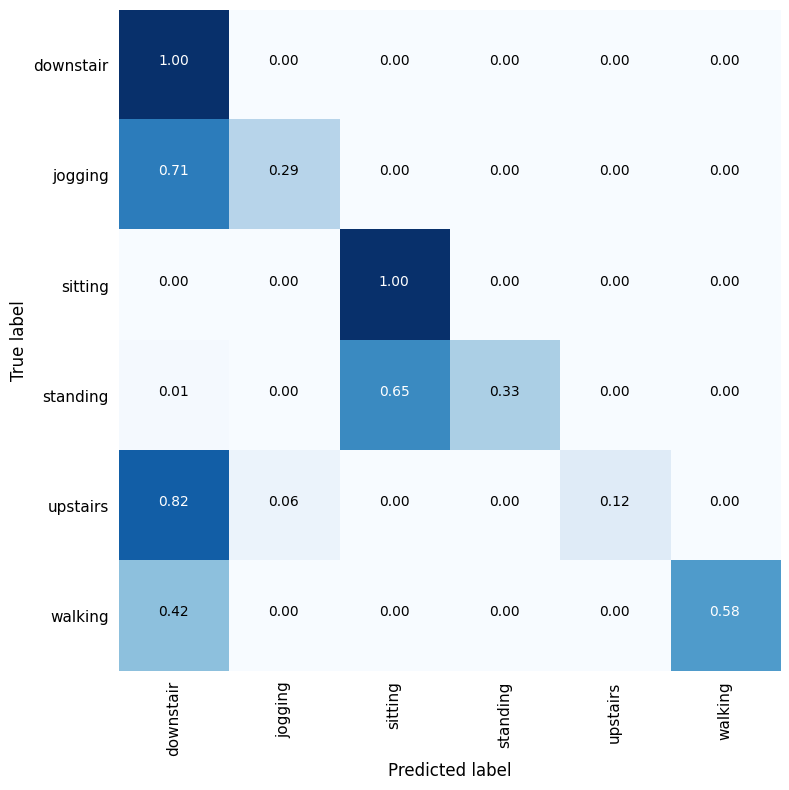

In [80]:
cm = [np.zeros([len(classes)]) for _ in range(len(classes))]

n_epochs = 200
batch_size = 128


# get validation data from Sub_24(target) data
samples_fine_tuning, samples_val, ohe_labels_fine_tuning, ohe_labels_val = train_test_split(samples[fine_tuning], ohe_labels[fine_tuning], test_size=0.1)


print("\nCreating the model...")
model = hybrid()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


print("\nTraining...")
history = model.fit(x=samples_fine_tuning,
                  y=ohe_labels_fine_tuning,
                  batch_size = batch_size,
                  epochs = n_epochs,
                  validation_data = (samples_val, ohe_labels_val))


print("\nPredicting...")
y_preds = model.predict(samples[test])

y_preds = np.argmax(y_preds, axis=1)
y_targets = np.argmax(ohe_labels[test], axis=1)


print("\nClassification Report:")
print(classification_report(y_targets, y_preds, target_names=classes, labels=np.array([i for i in range(len(classes))]), digits=4, zero_division=0))


print("\nConfusion Matrix:")
s_preds, s_targets = [], []
for el in y_preds: s_preds.append(classes[el])
for el in y_targets: s_targets.append(classes[el])

cm += confusion_matrix(s_targets, s_preds, labels=classes)
cm = cm.astype(np.int32)

plot_confusion_matrix(cm, classes)

# Transfer Learning Model

This will be our transfer learning pipeline:

1. **Pre-training**: pre-train a classifier on the pre-train set without the sitting activity

2. **Fine-tuning**: take the layers of the pre-trained model in charge of extracting features, add new trainable layers on top of them, and fine tune the model on the fine-tuning set. The new layers will learn how to turn the old features into predictions for the new subject (including the Sitting activity). The goal is to adapt the model to the specific characteristics of the target problem while retaining the general knowledge learned during pretraining. This step can be implemented in two different ways: by freezing or unfreezing the feature extraction layers. If we unfreeze the layers, it is typically better to user a very low learning rate to avoid changing unsafely the weights of the feature extraction layers

<br>

#Pre-training with all the data of 23 subjects excluding Sitting activity

In [92]:
# Creating the One hot encoding for the Original list of labels
enc = OneHotEncoder()
ohe_labels_pre_train = enc.fit_transform(labels[pre_train].reshape(-1,1)).toarray()

classes_pre_train = sorted(list(set(labels[pre_train])))
print(f"Original list of labels: {classes_pre_train}")

print(f'Example of original label: {labels[pre_train][0]}')
print(f"...and the corresponding one-hot encoded version: {ohe_labels_pre_train[0]}")

Original list of labels: ['downstair', 'jogging', 'standing', 'upstairs', 'walking']
Example of original label: jogging
...and the corresponding one-hot encoded version: [0. 1. 0. 0. 0.]


Design the pre-train classifier

In [94]:
# Here also we use a Hybrid CNN-LSTM model

def pre_train_classifier(num_classes=len(classes_pre_train)):
  input = Input((200, 6), name="input")
  x1 = Conv1D(filters=32, kernel_size=24, activation='relu', name="conv1")(input)
  x1 = MaxPooling1D(4, 1, padding="valid", name="max_pool1")(x1)
  x1 = Conv1D(filters=64, kernel_size=16, activation='relu', name="conv2")(x1)
  x1 = MaxPooling1D(4, 1, padding="valid", name="max_pool2")(x1)
  x1 = Conv1D(filters=96, kernel_size=8, activation='relu', name="conv3")(x1)
  x1 = MaxPooling1D(4, 1, padding="valid", name="max_pool3")(x1)
  x1 = tf.keras.layers.LSTM(units=64, name="lstm",return_sequences=True)(x1)
  x1 = GlobalMaxPool1D(name='global_max_pooling1d')(x1)
  classification_out = Dense(num_classes, activation='softmax', name="classification_out")(x1)

  model = Model(inputs=input, outputs=classification_out, name="pre_train_classifier")

  return model

model = pre_train_classifier()
print(model.summary())

Model: "pre_train_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 200, 6)]          0         
                                                                 
 conv1 (Conv1D)              (None, 177, 32)           4640      
                                                                 
 max_pool1 (MaxPooling1D)    (None, 174, 32)           0         
                                                                 
 conv2 (Conv1D)              (None, 159, 64)           32832     
                                                                 
 max_pool2 (MaxPooling1D)    (None, 156, 64)           0         
                                                                 
 conv3 (Conv1D)              (None, 149, 96)           49248     
                                                                 
 max_pool3 (MaxPooling1D)    (None, 146, 96)  

Do the pre-training

In [95]:
# use the pre-train selected set where we use all subject's (except sub_24), all activities (except sitting)

n_epochs = 200
batch_size = 128

print("Creating the model...")
pre_trained_model = pre_train_classifier()
pre_trained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


# get validation data
samples_pre_train, samples_val, ohe_labels_pre_train, ohe_labels_val = train_test_split(samples[pre_train], ohe_labels_pre_train, test_size=0.2)


print("\nTraining...")
history = pre_trained_model.fit(x=samples_pre_train,
                  y=ohe_labels_pre_train,
                  batch_size = batch_size,
                  epochs = n_epochs,
                  validation_data = (samples_val, ohe_labels_val)
                  verbose=0)


print("\nSaving model...")
pre_trained_model.save(f"{project_path}/pre_trained_model")

Creating the model...

Training...

Saving model...


In [96]:
test_for_pre_train = [i for i in test if i not in np.where(labels == "sitting")[0]]
print(len(test_for_pre_train))

171


In [97]:
classes_pre_train

['downstair', 'jogging', 'standing', 'upstairs', 'walking']

Test the pre-train classifier


Predicting...
6/6 [==============================] - 1s 32ms/step

Classification Report:
              precision    recall  f1-score   support

   downstair     0.0000    0.0000    0.0000        12
     jogging     0.2464    1.0000    0.3953        17
    standing     1.0000    1.0000    1.0000        72
    upstairs     0.0000    0.0000    0.0000        17
     walking     0.6667    0.3774    0.4819        53

    accuracy                         0.6374       171
   macro avg     0.3826    0.4755    0.3755       171
weighted avg     0.6522    0.6374    0.6097       171


Confusion Matrix:


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

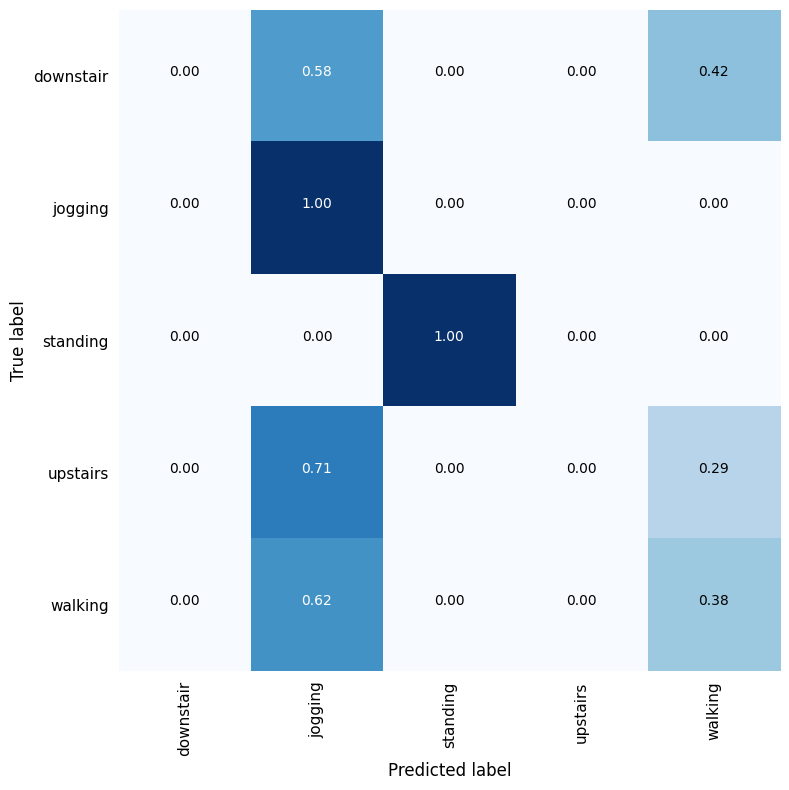

In [110]:
# load the pre-trained classifier
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")

enc = OneHotEncoder()
ohe_labels_test_for_pre_train = enc.fit_transform(labels[test_for_pre_train].reshape(-1,1)).toarray()

print("\nPredicting...")
y_preds = pre_trained_model.predict(samples[test_for_pre_train])

y_preds = np.argmax(y_preds, axis=1)
y_targets = np.argmax(ohe_labels_test_for_pre_train, axis=1)


print("\nClassification Report:")
print(classification_report(y_targets, y_preds, target_names=classes_pre_train, labels=np.array([i for i in range(len(classes_pre_train))]), digits=4, zero_division=0))


print("\nConfusion Matrix:")
s_preds, s_targets = [], []
for el in y_preds: s_preds.append(classes_pre_train[el])
for el in y_targets: s_targets.append(classes_pre_train[el])

cm = [np.zeros([len(classes_pre_train)]) for _ in range(len(classes_pre_train))]
cm += confusion_matrix(s_targets, s_preds, labels=classes_pre_train)
cm = cm.astype(np.int32)

plot_confusion_matrix(cm, classes_pre_train)


#Fine Tuning

It's time for fine-tuning

In [40]:
classes

['downstair', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']

In [101]:
# This fine tuning classifier will take the output from the last "lstm" layer and add a new layer for training.
# The idea is that this layer will be used to identify the 24th subject's activity and to identify the new activity labelled as Sitting

def fine_tune_classifier(pre_trained_model, freeze_feature_extractors=True, num_classes=len(classes)):
  feature_extractor = pre_trained_model.get_layer("lstm").output  #taking output from LSTM layer

  x = GlobalMaxPool1D(name='global_max_pooling')(feature_extractor) #Max pooling added
  classification_out = Dense(num_classes, activation='softmax', name="classification_out")(x) # SoftMax layer

  model = Model(inputs=pre_trained_model.input, outputs=classification_out, name="fine_tuning_classifier")

  if freeze_feature_extractors:
    for layer in model.layers[:-2]: layer.trainable = False # Making the model frozen except the last layers
  else:
    for layer in model.layers[:-2]: layer.trainable = True # Making teh model fully trainable

  return model

<br>

The number of trainable params after freezing comes out to be only 390

In [102]:
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")
model = fine_tune_classifier(pre_trained_model, freeze_feature_extractors=True)
print(model.summary())

print("\nTrainable layers:")
for layer in model.layers:
  print(layer.name, layer.trainable)

Model: "fine_tuning_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 200, 6)]          0         
                                                                 
 conv1 (Conv1D)              (None, 177, 32)           4640      
                                                                 
 max_pool1 (MaxPooling1D)    (None, 174, 32)           0         
                                                                 
 conv2 (Conv1D)              (None, 159, 64)           32832     
                                                                 
 max_pool2 (MaxPooling1D)    (None, 156, 64)           0         
                                                                 
 conv3 (Conv1D)              (None, 149, 96)           49248     
                                                                 
 max_pool3 (MaxPooling1D)    (None, 146, 96)

The number of trainable parameters in case of unfrozen layers is 128,326, while the number of trainable parameters for frozen model is only 390

In [103]:
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")
model = fine_tune_classifier(pre_trained_model, freeze_feature_extractors=False)
print(model.summary())

print("\nTrainable layers:")
for layer in model.layers:
  print(layer.name, layer.trainable)

Model: "fine_tuning_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 200, 6)]          0         
                                                                 
 conv1 (Conv1D)              (None, 177, 32)           4640      
                                                                 
 max_pool1 (MaxPooling1D)    (None, 174, 32)           0         
                                                                 
 conv2 (Conv1D)              (None, 159, 64)           32832     
                                                                 
 max_pool2 (MaxPooling1D)    (None, 156, 64)           0         
                                                                 
 conv3 (Conv1D)              (None, 149, 96)           49248     
                                                                 
 max_pool3 (MaxPooling1D)    (None, 146, 96)

#Fine-tuning while freezing the feature extraction layers

Loading the pre-trained model...

Creating the new model to fine-tune...
Layers frozen

Fine-tuning with frozen...
Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.4738 - accuracy: 0.3000 - val_loss: 2.4983 - val_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 71ms/step - loss: 2.4386 - accuracy: 0.3000 - val_loss: 2.4674 - val_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 72ms/step - loss: 2.4036 - accuracy: 0.3000 - val_loss: 2.4368 - val_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 72ms/step - loss: 2.3690 - accuracy: 0.3000 - val_loss: 2.4066 - val_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 71ms/step - loss: 2.3347 - accuracy: 0.3000 - val_loss: 2.3767 - val_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 72ms/step - loss: 2.3007 - accuracy: 0.3000 - val_loss: 2.3472 - val_accuracy: 0.5000
Epoch 7/1000
1/1 [=======================

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

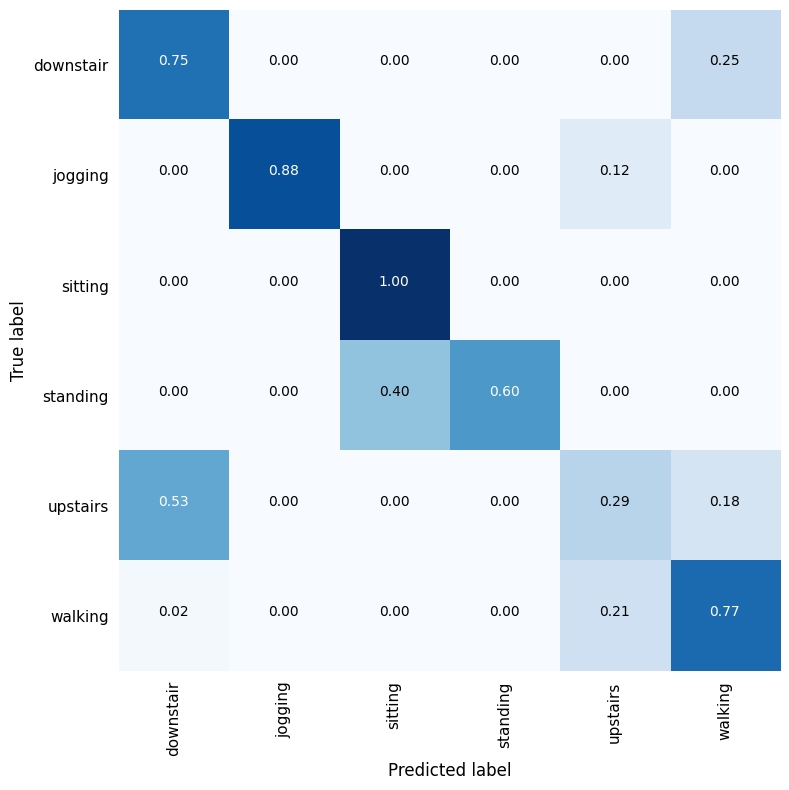

In [104]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', restore_best_weights=True)

cm = [np.zeros([len(classes)]) for _ in range(len(classes))]

n_epochs = 1000
batch_size = 128


# using the fine tuning data to train the pre-trained model including sitting
samples_fine_tuning, samples_val, ohe_labels_fine_tuning, ohe_labels_val = train_test_split(samples[fine_tuning], ohe_labels[fine_tuning], test_size=0.1)


print("Loading the pre-trained model...")
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")


print("\nCreating the new model to fine-tune...")
print("Layers frozen")
model = fine_tune_classifier(pre_trained_model, freeze_feature_extractors=True) # Layers frozen
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


print("\nFine-tuning with frozen...")
history = model.fit(x=samples_fine_tuning,
                  y=ohe_labels_fine_tuning,
                  batch_size = batch_size,
                  epochs = n_epochs,
                  validation_data = (samples_val, ohe_labels_val)
                  #,callbacks=[early_stopping]
                    )


print("\nPredicting...")
# Trying to predict on the rest 95% of the user's data including Sitting
y_preds = model.predict(samples[test])

y_preds = np.argmax(y_preds, axis=1)
y_targets = np.argmax(ohe_labels[test], axis=1)


print("\nClassification Report:")
print(classification_report(y_targets, y_preds, target_names=classes, labels=np.array([i for i in range(len(classes))]), digits=4, zero_division=0))


print("\nConfusion Matrix:")
s_preds, s_targets = [], []
for el in y_preds: s_preds.append(classes[el])
for el in y_targets: s_targets.append(classes[el])

cm += confusion_matrix(s_targets, s_preds, labels=classes)
cm = cm.astype(np.int32)

plot_confusion_matrix(cm, classes)

#Fine-tuning without freezing the feature extraction layers

Loading the pre-trained model...

Creating the new model to fine-tune...

Fine-tuning...
Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 1.7532 - accuracy: 0.3000 - val_loss: 1.5618 - val_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 116ms/step - loss: 1.6651 - accuracy: 0.4000 - val_loss: 1.5502 - val_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 123ms/step - loss: 1.6089 - accuracy: 0.4000 - val_loss: 1.5367 - val_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 121ms/step - loss: 1.5693 - accuracy: 0.4000 - val_loss: 1.5201 - val_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 126ms/step - loss: 1.5359 - accuracy: 0.4000 - val_loss: 1.5006 - val_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 132ms/step - loss: 1.5085 - accuracy: 0.4000 - val_loss: 1.4758 - val_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 125ms/s

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

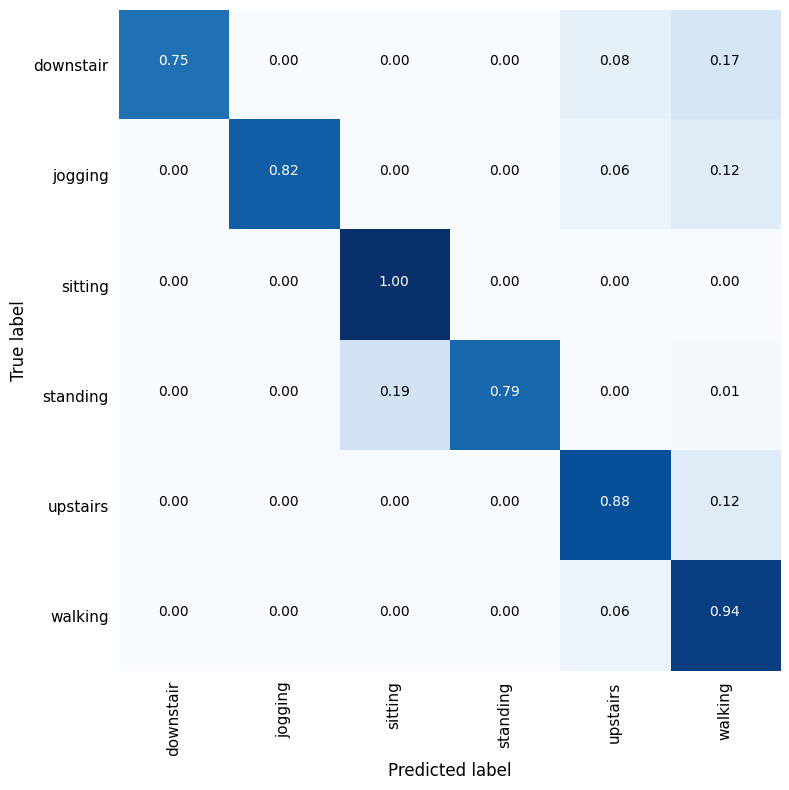

In [106]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

cm = [np.zeros([len(classes)]) for _ in range(len(classes))]

n_epochs = 1000
batch_size = 128


# using the fine tuning data to train the pre-trained model including sitting
samples_fine_tuning, samples_val, ohe_labels_fine_tuning, ohe_labels_val = train_test_split(samples[fine_tuning], ohe_labels[fine_tuning], test_size=0.1)


print("Loading the pre-trained model...")
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")


print("\nCreating the new model to fine-tune...")
model = fine_tune_classifier(pre_trained_model, freeze_feature_extractors=False)
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])


print("\nFine-tuning...")
history = model.fit(x=samples_fine_tuning,
                  y=ohe_labels_fine_tuning,
                  batch_size = batch_size,
                  epochs = n_epochs,
                  validation_data = (samples_val, ohe_labels_val),
                  #callbacks=[early_stopping]
                    )


print("\nPredicting...")
# Trying to predict on the rest 95% of the user's data including Sitting
y_preds = model.predict(samples[test])

y_preds = np.argmax(y_preds, axis=1)
y_targets = np.argmax(ohe_labels[test], axis=1)


print("\nClassification Report:")
print(classification_report(y_targets, y_preds, target_names=classes, labels=np.array([i for i in range(len(classes))]), digits=4, zero_division=0))


print("\nConfusion Matrix:")
s_preds, s_targets = [], []
for el in y_preds: s_preds.append(classes[el])
for el in y_targets: s_targets.append(classes[el])

cm += confusion_matrix(s_targets, s_preds, labels=classes)
cm = cm.astype(np.int32)

plot_confusion_matrix(cm, classes)

Using 95% of target data and using rest 5% for predict

Loading the pre-trained model...

Creating the new model to fine-tune...

Fine-tuning...
Epoch 1/1000
2/2 [==============================] - 3s 740ms/step - loss: 2.9110 - accuracy: 0.0093 - val_loss: 2.6942 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 1s 321ms/step - loss: 2.7047 - accuracy: 0.0093 - val_loss: 2.5297 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 1s 322ms/step - loss: 2.5575 - accuracy: 0.0093 - val_loss: 2.4467 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 1s 333ms/step - loss: 2.4562 - accuracy: 0.0093 - val_loss: 2.3533 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 1s 317ms/step - loss: 2.3646 - accuracy: 0.0000e+00 - val_loss: 2.2590 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 1s 338ms/step - loss: 2.2758 - accuracy: 0.0000e+00 - val_loss: 2.1547 - val_accuracy: 0.0000e+00
Epoch 7/1000
2/2 [=========

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

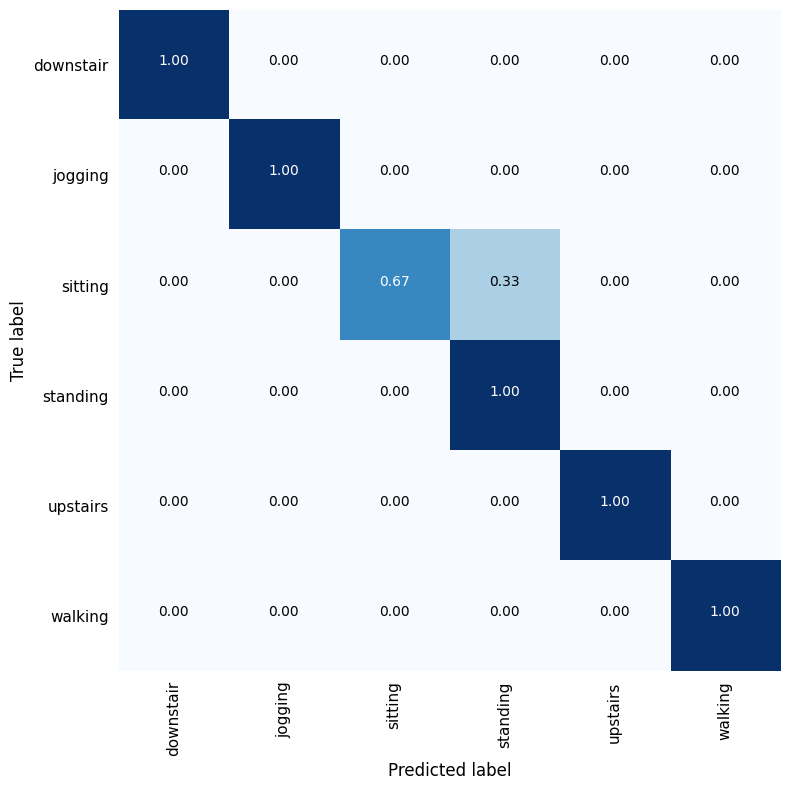

In [108]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

cm = [np.zeros([len(classes)]) for _ in range(len(classes))]

n_epochs = 1000
batch_size = 128


# using the user's 95% (almost all) labelled data to train the pre-trained model including sitting
samples_test, samples_val, ohe_labels_test, ohe_labels_val = train_test_split(samples[test], ohe_labels[test], test_size=0.1)


print("Loading the pre-trained model...")
pre_trained_model = tf.keras.models.load_model(f"{project_path}/pre_trained_model")


print("\nCreating the new model to fine-tune...")
model = fine_tune_classifier(pre_trained_model, freeze_feature_extractors=False)
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])


print("\nFine-tuning...")
history = model.fit(x=samples_test,
                  y=ohe_labels_test,
                  batch_size = batch_size,
                  epochs = n_epochs,
                  validation_data = (samples_val, ohe_labels_val),
                  #callbacks=[early_stopping]
                    )


print("\nPredicting...")
# Trying to predict on the rest 5% of the user's data including Sitting
y_preds = model.predict(samples[fine_tuning])

y_preds = np.argmax(y_preds, axis=1)
y_targets = np.argmax(ohe_labels[fine_tuning], axis=1)


print("\nClassification Report:")
print(classification_report(y_targets, y_preds, target_names=classes, labels=np.array([i for i in range(len(classes))]), digits=4, zero_division=0))


print("\nConfusion Matrix:")
s_preds, s_targets = [], []
for el in y_preds: s_preds.append(classes[el])
for el in y_targets: s_targets.append(classes[el])

cm += confusion_matrix(s_targets, s_preds, labels=classes)
cm = cm.astype(np.int32)

plot_confusion_matrix(cm, classes)

#Conclusion

In a nutshell while summarizing, we have done

cross-subject transfer learning in HAR, assuming different data scarcity scenarios on the target user (5%) and also a different activities set of activities ("Sitting")

We have used Hybrid CNN-LSTM as a deep learning model and fine-tuning as a transfer learning technique. We have used the
Leave one out subject for validating transfer learning on each subject of the Motionsense dataset.

We have first shown a fully supervised learning only baseline model using data from the target user (no transfer).
Hence, in each fold of the leave-one-out, the baseline model consists in training a model only with data from the target user.
This baseline is useful to understand the recognition rate of the model while only using data from the target user, without transfer.

# Result

R1: Transfer learning should reach better results than simply training a model for the target user with its limited fine-tuning data.

**Baseline model's result:**

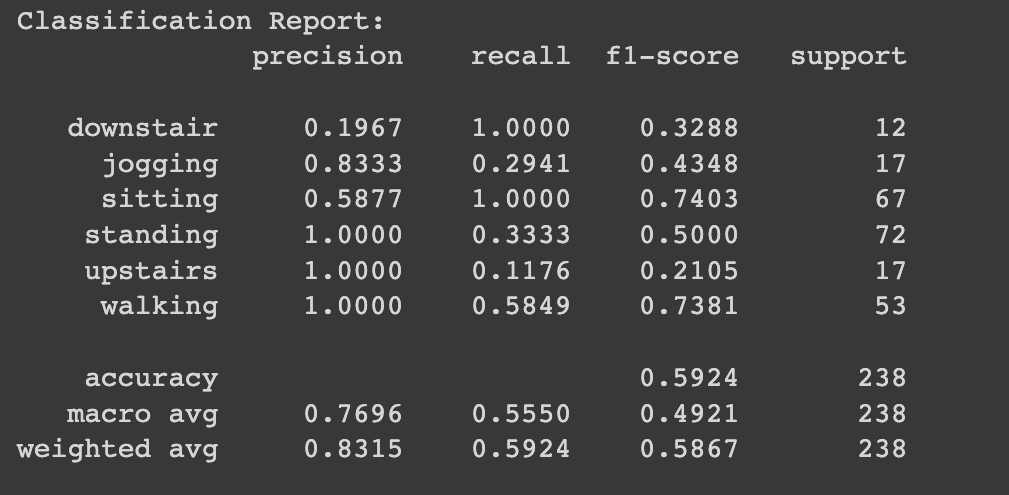









**Unfrozen layer transfer learning model with limited fine-tuning data of new subject with new activity**

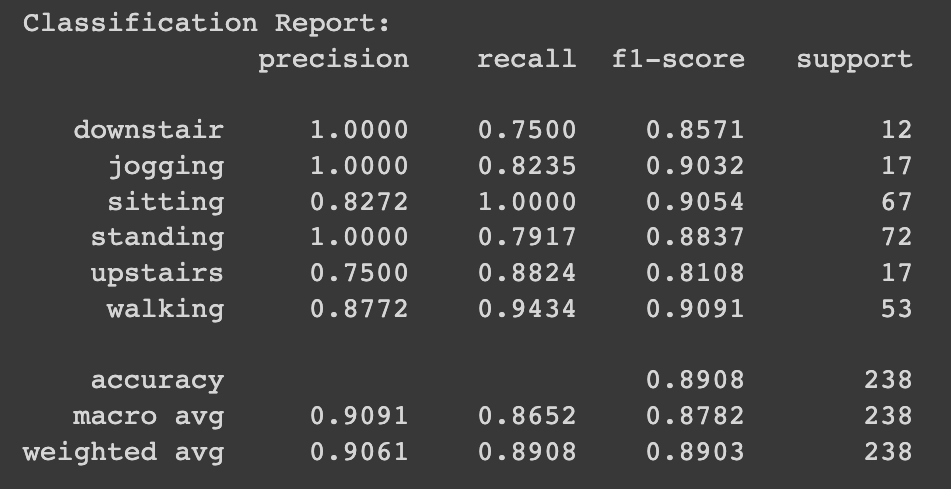


R2: Transfer learning should reach similar results compared to using 100% of the training data of the target user.


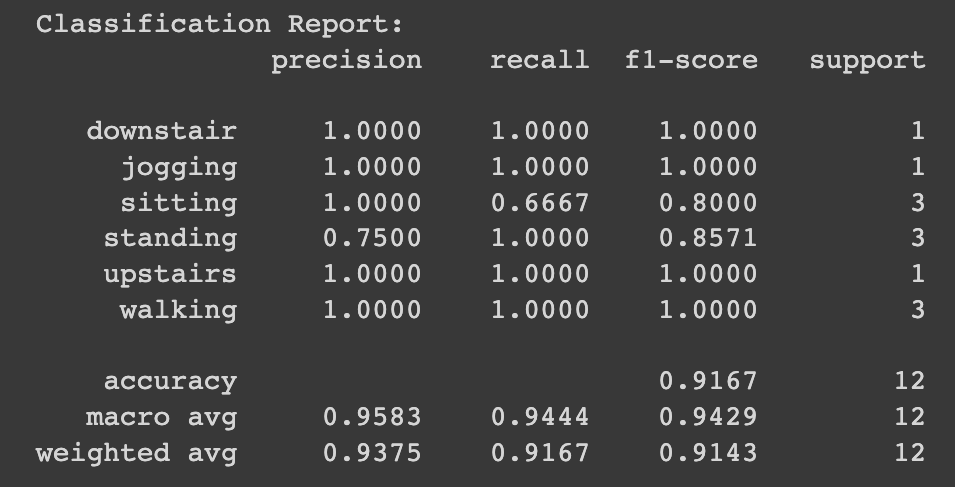


